In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import linear_model
from numpy import genfromtxt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier   
from sklearn.decomposition import PCA
from sklearn import tree
from imblearn.over_sampling import ADASYN 
from collections import Counter
from fancyimpute import KNN,BiScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier  #梯度提升树
from sklearn import svm
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
from  numpy  import   array
from  numpy  import  argmax
from  sklearn.model_selection import train_test_split

from Codebase11 import Valuestandard
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score as AUC
from  sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import  metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import confusion_matrix as CM,precision_score as P,recall_score as R

Using TensorFlow backend.


In [2]:
data = pd.read_csv('stroke1905.csv')
x = data.drop(columns=['mrs'])
y = data["mrs"].copy()
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [3]:
x_train_standard1 = pd.read_csv('x_train_standard1.csv')
x_test_standard1 = pd.read_csv('x_test_standard1.csv')

In [4]:
x_train_standard1.columns = ['Age', 'NIHSS on admission', 'SBP', 'Creatinine', 'FBG', 'Triglycerides', 'Hemiplegia',
       'Hypertension', 'Previous ischemic stroke', 'Current drink',
       'Premorbid mRS = 1', 'TOAST_LAA', 'TOAST_SAO']

In [5]:
x_test_standard1.columns = ['Age', 'NIHSS on admission', 'SBP', 'Creatinine', 'FBG', 'Triglycerides', 'Hemiplegia',
       'Hypertension', 'Previous ischemic stroke', 'Current drink',
       'Premorbid mRS = 1', 'TOAST_LAA', 'TOAST_SAO']

LR

In [6]:
import itertools
lr = LR(C=1,penalty="l2", solver = "liblinear", max_iter=100,class_weight = {0:1,1:4},random_state = 10)
lr.fit(x_train_standard1,y_train)
y_pred_lr = lr.predict(x_train_standard1)

# LR SHAP

In [8]:
import shap
x_train_summary = shap.kmeans(x_train_standard1,5)

explainer_lr = shap.KernelExplainer(lr.predict, x_train_summary)

In [9]:
shap_values= explainer_lr.shap_values(x_train_standard1)

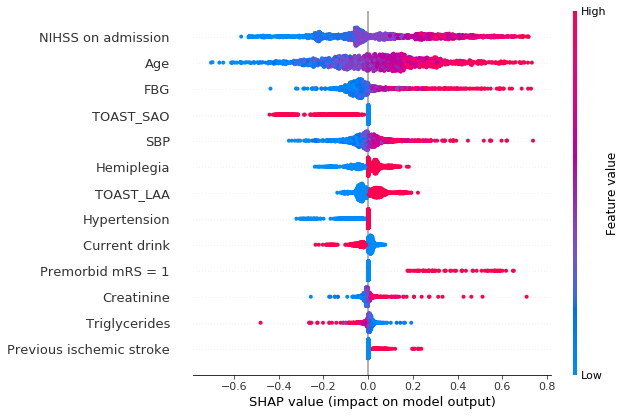

In [10]:
shap.summary_plot(shap_values, x_train_standard1)

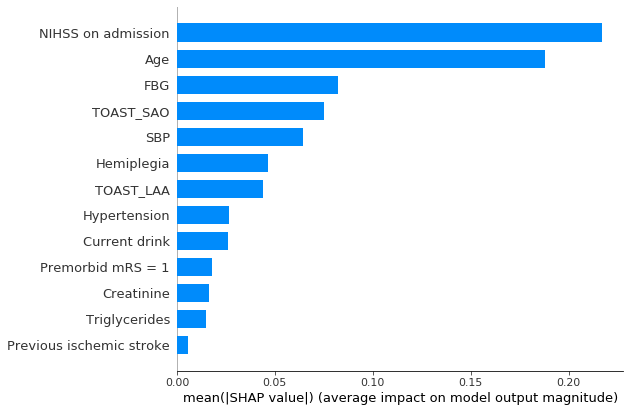

In [11]:
shap.summary_plot(shap_values, x_train_standard1, plot_type="bar")

RFC

In [8]:
rfc1 = RandomForestClassifier(max_depth=3,min_samples_split=50,min_samples_leaf=10,
                              class_weight = {0:1,1:4},n_estimators=200,random_state = 10)
rfc1.fit(x_train_standard1,y_train.ravel())

RandomForestClassifier(class_weight={0: 1, 1: 4}, max_depth=3,
                       min_samples_leaf=10, min_samples_split=50,
                       n_estimators=200, random_state=10)

In [46]:
import shap


explainer_rfc = shap.TreeExplainer(rfc1)

In [56]:
shap_values= explainer_rfc.shap_values(x_train_standard1)

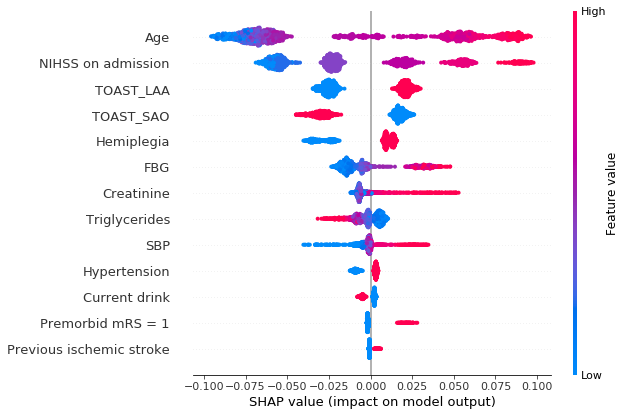

In [68]:
shap.summary_plot(shap_values[1], x_train_standard1,plot_type='dot')

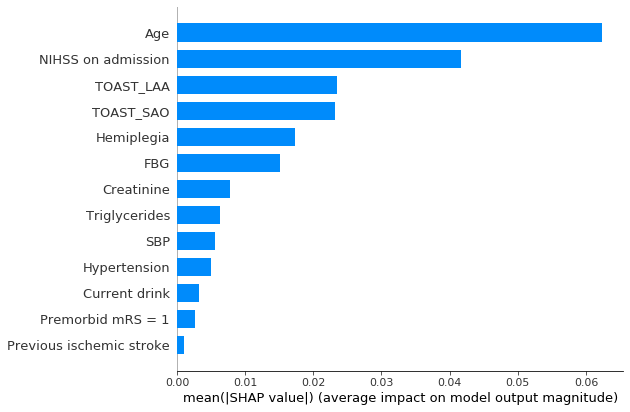

In [62]:
shap.summary_plot(shap_values[1], x_train_standard1, plot_type="bar")

SVM

In [12]:
from sklearn.svm import SVC
svm1=SVC(C=0.5,gamma=0.01,kernel='rbf',probability = True,class_weight = {0:1,1:4},random_state=20)
svm1.fit(x_train_standard1,y_train.ravel())
# y_pred_svm = svm1.predict(x_train_standard1)
# y_pred_svm_proba = svm1.predict_proba(x_train_standard1)

SVC(C=0.5, class_weight={0: 1, 1: 4}, gamma=0.01, probability=True,
    random_state=20)

# SVM SHAP

In [34]:
# svm1.predict(x_test_standard1)
a = svm1.decision_function
a

<bound method BaseSVC.decision_function of SVC(C=0.5, class_weight={0: 1, 1: 4}, gamma=0.01, probability=True,
    random_state=20)>

In [35]:
import shap




explainer = shap.KernelExplainer(svm1.predict, x_train_summary)


In [38]:
shap_values= explainer.shap_values(x_train_standard1)

In [39]:
shap_values.shape

(1524, 13)

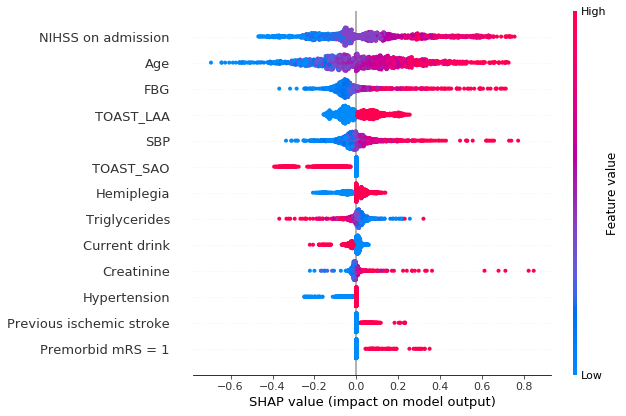

In [40]:
shap.summary_plot(shap_values, x_train_standard1)

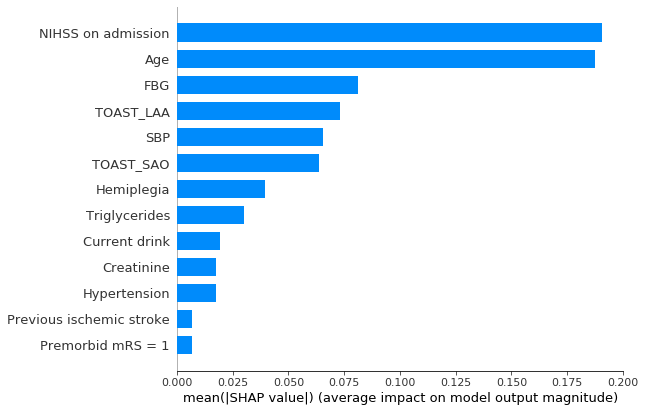

In [41]:
shap.summary_plot(shap_values, x_train_standard1, plot_type="bar")

XGB

In [18]:
xgb = XGBClassifier(max_depth=2,n_estimators =20,gamma=0.5,min_child_weight=1,objective= 'binary:logistic',random_state = 10)
xgb.fit(x_train_standard1,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=0, num_parallel_tree=1, random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# XGB SHAP

In [24]:
import shap
explainer_xgb = shap.TreeExplainer(xgb)

In [25]:
shap_values= explainer_xgb.shap_values(x_train_standard1)

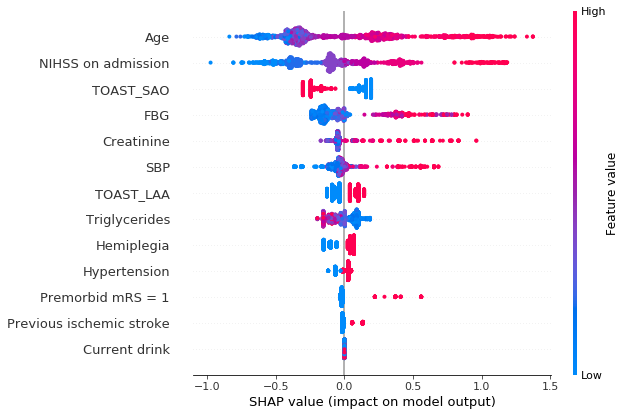

In [26]:
shap.summary_plot(shap_values, x_train_standard1,plot_type='dot')

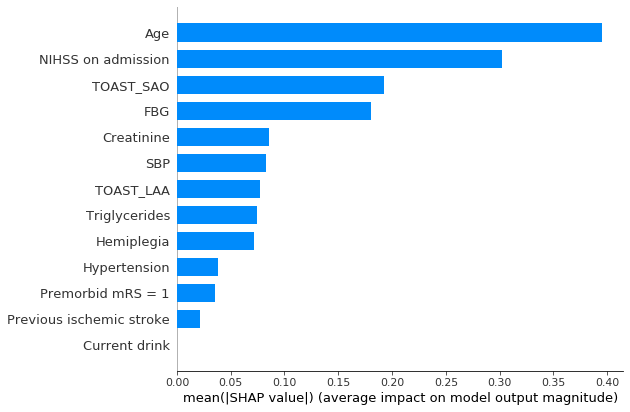

In [27]:
shap.summary_plot(shap_values, x_train_standard1, plot_type="bar")

# DNN

In [28]:
import keras as K
from keras import layers
from keras.layers import Input,Dense,Activation,Dropout
from keras.models import Model
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from  tensorflow.keras.models import load_model
from keras.optimizers import SGD,Nadam

In [29]:

#model.save('stroke_dnnmodel')

In [30]:
stroke = load_model('stroke_dnnmodel')

In [84]:
import shap

#汇总数据集
x_train_summary = shap.kmeans(x_train_standard1,5)

# 获得一个解释器
explainer_ann = shap.KernelExplainer(stroke.predict, x_train_summary)

In [85]:
shap_values= explainer_ann.shap_values(x_train_standard1)

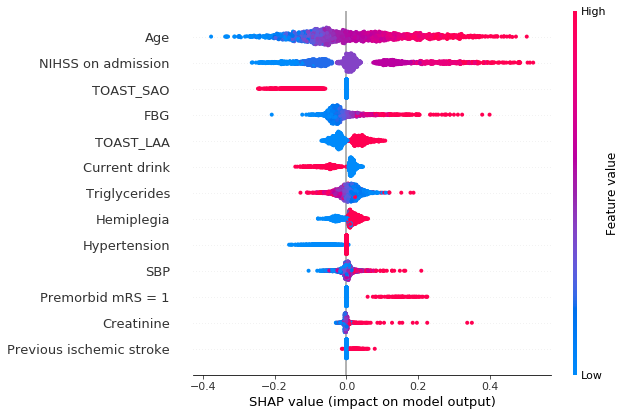

In [87]:
shap.summary_plot(shap_values[0], x_train_standard1)

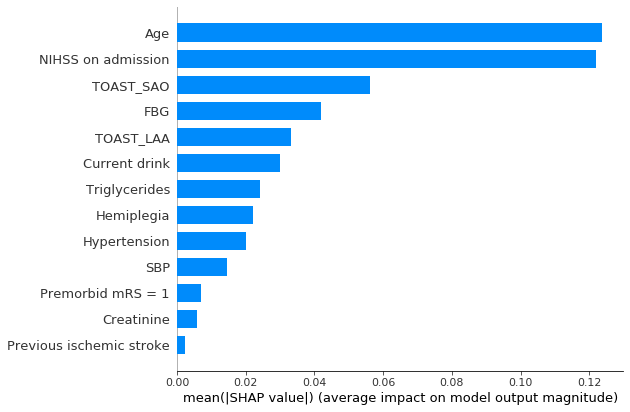

In [88]:
shap.summary_plot(shap_values[0], x_train_standard1, plot_type="bar")